### Importing the required libraries

In [43]:

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from IPython.display import display, HTML

### Defining two functions that are used to get a report of our datasets

In [9]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
def tbl_report(tbl, cols=None, card=10):
    print("Table Shape", tbl.shape)
    dtypes = tbl.dtypes
    nulls = []
    uniques = []
    numuniques = []
    vcs = []
    for col in dtypes.index:
        n = tbl[col].isnull().sum()
        nulls.append(n)
        strdtcol = str(dtypes[col])
        #if strdtcol == 'object' or strdtcol[0:3] == 'int' or strdtcol[0:3] == 'int':
        #print(strdtcol)
        uniqs = tbl[col].unique()
        uniquenums = uniqs.shape[0]
        if uniquenums < card: # low cardinality
            valcounts = pd.value_counts(tbl[col], dropna=False)
            vc = "\n".join(["{}:{}".format(k,v) for k, v in valcounts.items()])
        else:
            vc='HC' # high cardinality
        uniques.append(uniqs)
        numuniques.append(uniquenums)
        vcs.append(vc)
    nullseries = pd.Series(nulls, index=dtypes.index)
    uniqueseries = pd.Series(uniques, index=dtypes.index)
    numuniqueseries = pd.Series(numuniques, index=dtypes.index)
    vcseries = pd.Series(vcs, index=dtypes.index)
    df = pd.concat([dtypes, nullseries, uniqueseries, numuniqueseries, vcseries], axis=1)
    df.columns = ['dtype', 'nulls', 'uniques', 'num_uniques', 'value_counts']
    if cols:
        return pretty_print(df[cols])
    return pretty_print(df)


### Lets now load the training data

In [10]:
train_data = pd.read_csv('Data/training.zip')
train_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


### Loading the test data

In [4]:
test_data = pd.read_csv('Data/test.zip')
test_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [5]:
train_data.shape

(250000, 33)

#### Looks like we have a large dataset

### Let us now get the report of our training data 

In [6]:
tbl_report(train_data, cols=['dtype', 'nulls', 'num_uniques', 'value_counts'])

Table Shape (250000, 33)


,dtype,nulls,num_uniques,value_counts
EventId,int64,0,250000,HC
DER_mass_MMC,float64,0,108338,HC
DER_mass_transverse_met_lep,float64,0,101637,HC
DER_mass_vis,float64,0,100558,HC
DER_pt_h,float64,0,115563,HC
DER_deltaeta_jet_jet,float64,0,7087,HC
DER_mass_jet_jet,float64,0,68366,HC
DER_prodeta_jet_jet,float64,0,16593,HC
DER_deltar_tau_lep,float64,0,4692,HC
DER_pt_tot,float64,0,59042,HC


#### So, there are no nulls to be taken care of and the columns are in the required format

### Let us check if we have a balanced dataset now 

In [25]:
X = train_data.drop(['Weight', 'Label'], axis = 1)
X.set_index('EventId', inplace = True)
Y = train_data['Label']

In [26]:
print(Y.value_counts())

b    164333
s     85667
Name: Label, dtype: int64


#### Looks like we do indeed have an imbalanced dataset. Considering this, accuracy would not be a good metric of performance. F1 score would be a better fit.

### Replacing the labels with corresponding classes 1 for b and 0 for s

In [27]:
label = np.where(train_data['Label'] == 'b',1,0)
Y=label

### EDA

#### Finding the distribution of data per class will give us more information on how to handle the data

In [28]:
# Finding the number of features to be plotted
np.shape(X)[1]

30

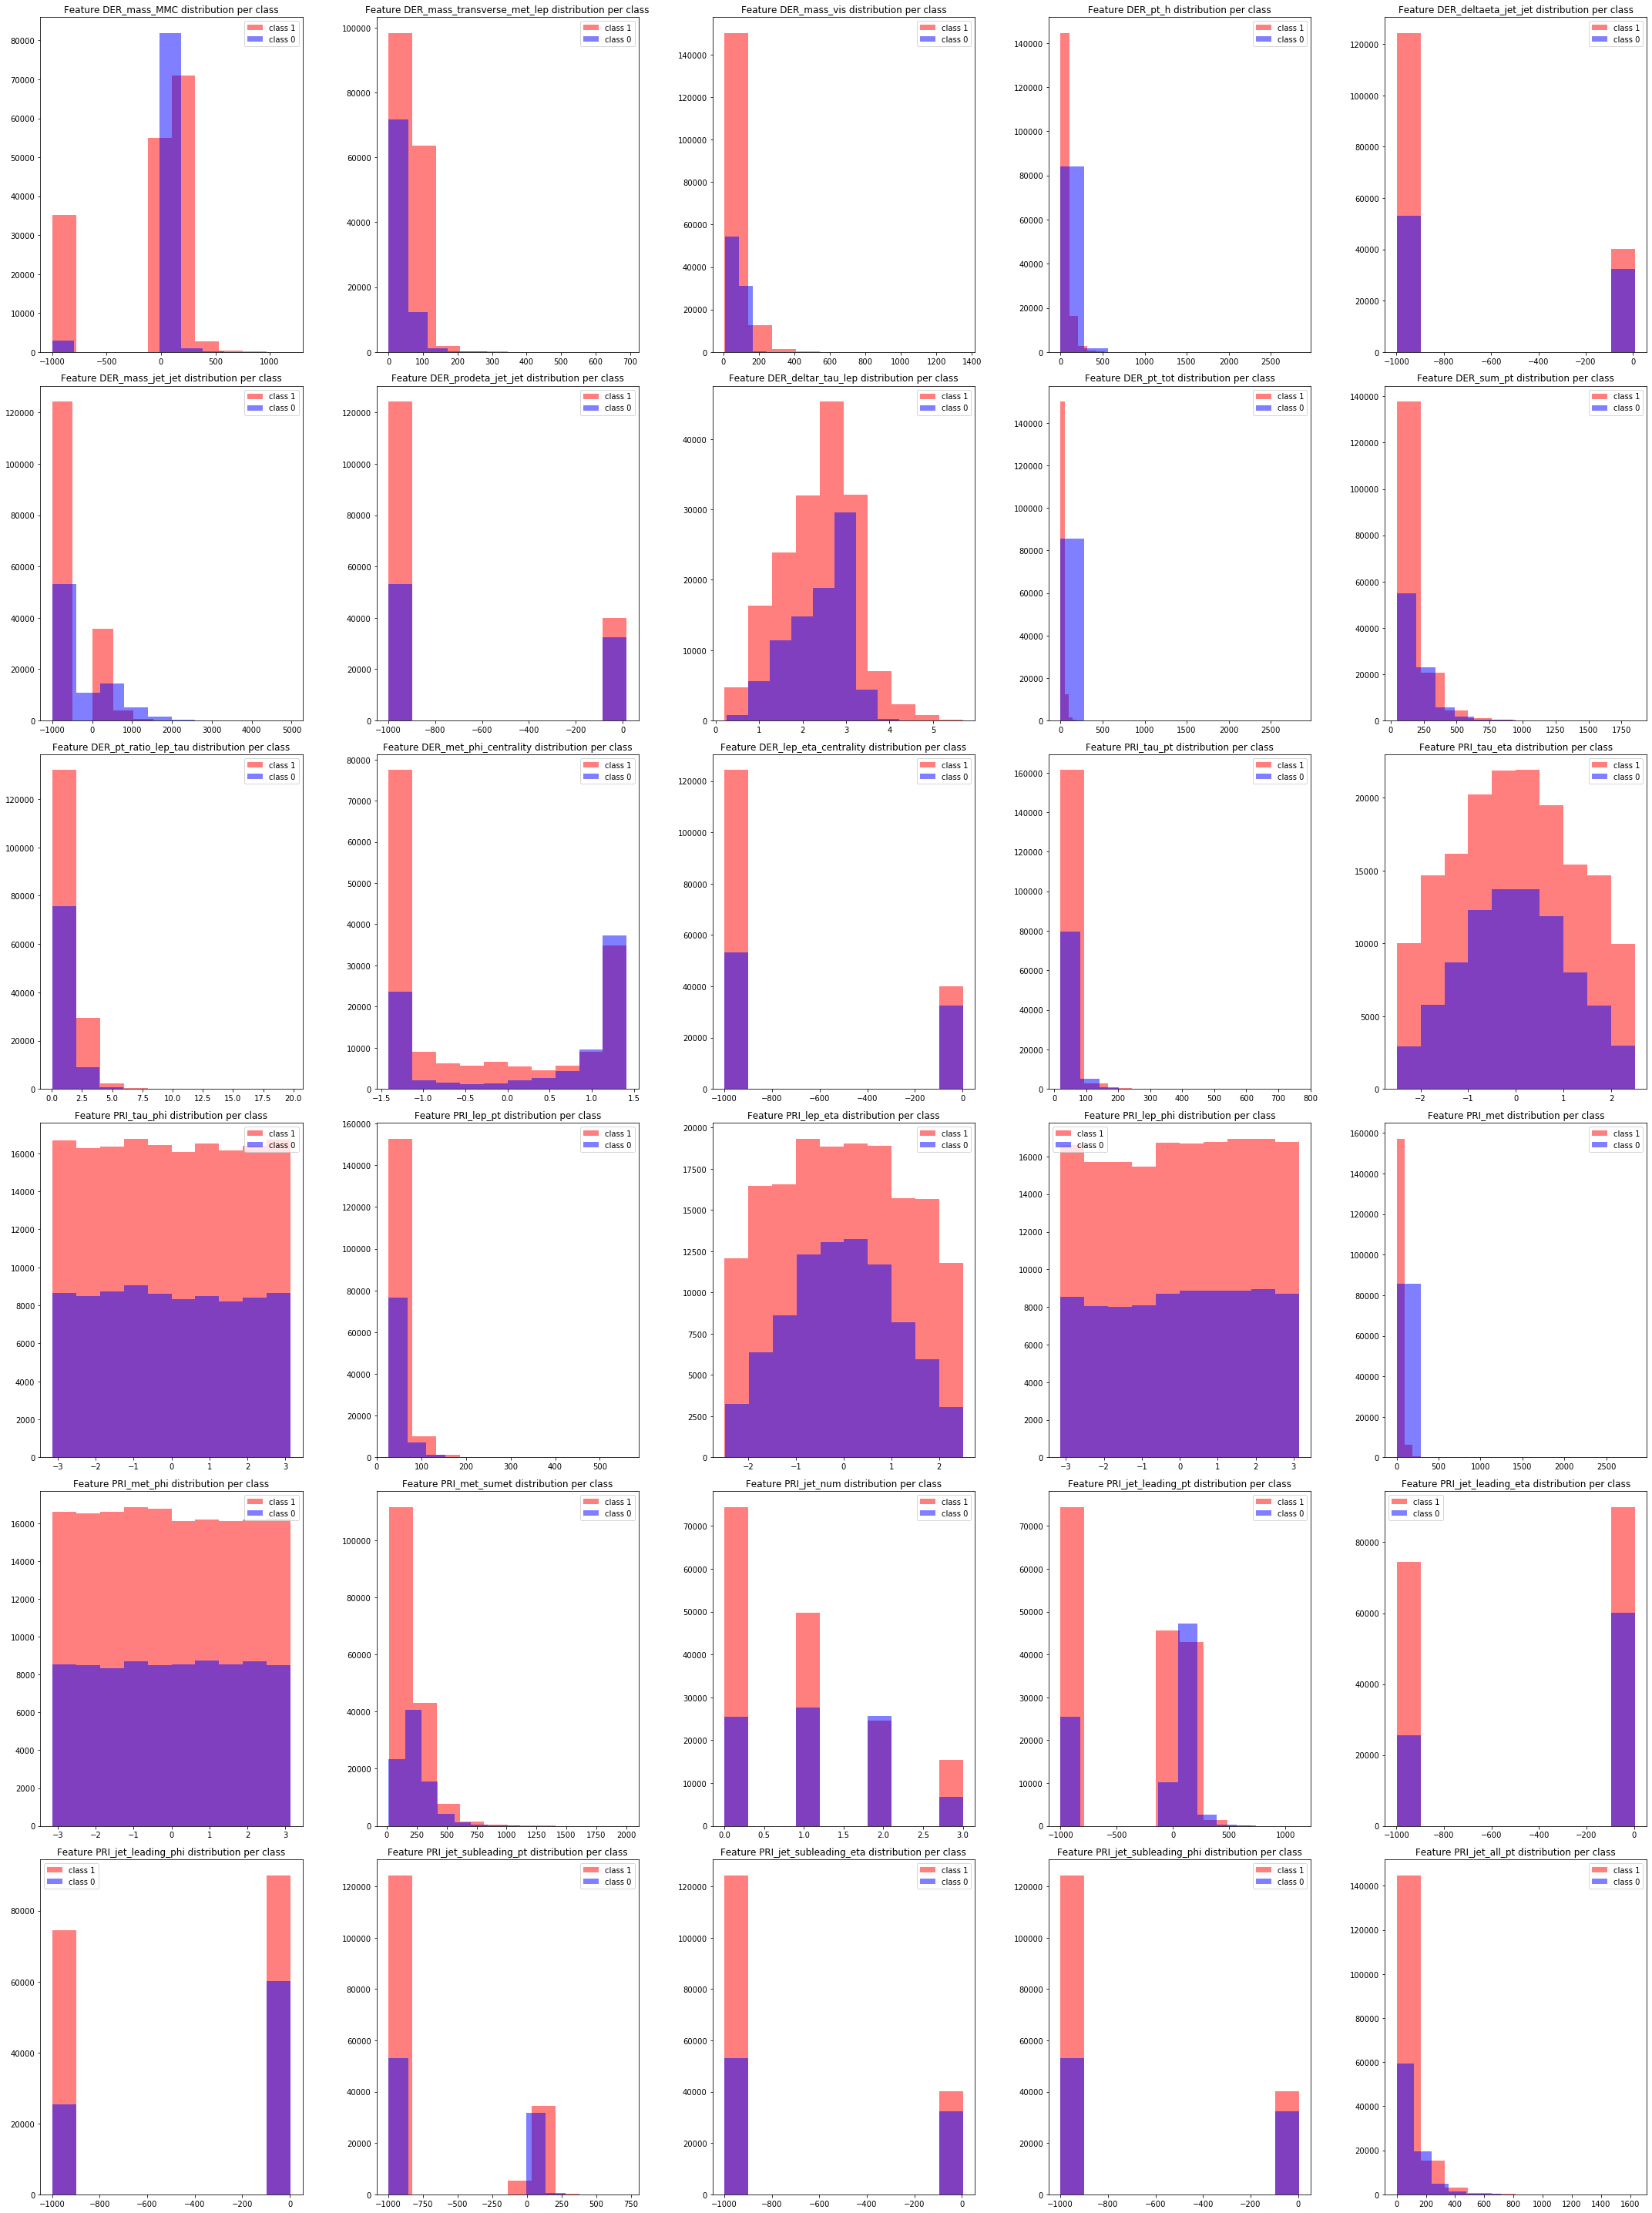

In [42]:
#Plotting a histogram of features per class
fig=plt.figure(figsize=(30,40))

for i in range(np.shape(X)[1]):
    ax=fig.add_subplot(6,5,i+1)
    ax.hist(X[Y==1].iloc[:,i],label='class 1',color='red',alpha=0.5)
    ax.hist(X[Y==0].iloc[:,i],label='class 0',color='blue',alpha=0.5)
    ax.set_title("Feature "+ X.columns[i] +" distribution per class")
    ax.legend()
fig.tight_layout();

#### We can see that the features have a distinct difference in the number of samples per bin and this can be accounted for by the imbalance in the data.

### Lets look at the relationship between any two features to pick out the collinearity between features

In [55]:
X.corr().style.background_gradient(cmap='Blues')

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
DER_mass_MMC,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.045826,0.201464,-0.017073,0.358963,0.162623,0.131495,0.002579,-0.006177,0.099445,0.010060,-0.000744,-0.233724,0.007411,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372
DER_mass_transverse_met_lep,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,0.017758,-0.146837,0.349504,-0.419757,-0.176262,-0.145464,-0.002109,0.001132,0.310648,-0.006777,0.000340,0.183716,-0.015925,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009
DER_mass_vis,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,-0.000702,0.088685,0.097490,-0.090846,-0.032220,0.290011,0.002127,-0.003624,0.405482,0.002196,-0.002018,-0.087330,-0.001467,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902
DER_pt_h,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,0.310501,0.832733,0.089187,0.539356,0.523720,0.407421,0.001665,0.005248,0.360939,0.008354,-0.002923,0.679585,0.008585,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616
DER_deltaeta_jet_jet,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,0.270878,0.671996,0.041307,0.368492,0.999998,0.188086,0.004866,0.003302,0.168039,0.008678,0.000069,0.305561,0.005245,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446
DER_mass_jet_jet,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,0.247771,0.680700,0.027674,0.369803,0.945584,0.204106,0.003584,0.003321,0.164026,0.007602,-0.000596,0.318497,0.005167,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962
DER_prodeta_jet_jet,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,0.271435,0.672158,0.041614,0.368177,0.999990,0.187936,0.004880,0.003309,0.168270,0.008692,0.000070,0.305678,0.005254,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620
DER_deltar_tau_lep,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,-0.148081,-0.432603,0.047046,-0.205441,-0.299115,-0.202035,0.003632,-0.011229,-0.069957,0.000699,-0.000776,-0.402345,-0.001570,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737
DER_pt_tot,0.045826,0.017758,-0.000702,0.310501,0.270878,0.247771,0.271435,-0.148081,1.000000,0.381160,0.039193,0.178448,0.271058,0.095754,0.003596,0.001452,0.109617,0.007987,-0.004249,0.269739,0.002515,0.448925,0.360409,0.202920,0.186564,0.186590,0.279203,0.271100,0.271091,0.403382
DER_sum_pt,0.201464,-0.146837,0.088685,0.832733,0.671996,0.680700,0.672158,-0.432603,0.381160,1.000000,0.108791,0.420679,0.672116,0.485847,0.002037,0.003931,0.460938,0.008781,-0.001892,0.520129,0.006712,0.904481,0.758503,0.638796,0.578616,0.578621,0.687465,0.672125,0.672114,0.965628


### Printing out the highly correlated features along with their correlation

In [76]:
feat={}
#Setting a threshold of 0.85 of correlation
threshold=0.85
for i in X.columns:
    temp=X.corr()[i]
    corr_features=temp[(abs(temp)>threshold) & (temp.index!=i)].index.values
    if(len(corr_features)!=0):
        for j in corr_features:
            A=(i,j)
            [x for x in A if not any([set(y).issubset(set(x)) for y in B])]
        

['DER_mass_jet_jet' 'DER_prodeta_jet_jet' 'DER_lep_eta_centrality'
 'PRI_jet_num' 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta'
 'PRI_jet_subleading_phi']
['DER_deltaeta_jet_jet' 'DER_prodeta_jet_jet' 'DER_lep_eta_centrality'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi']
['DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_lep_eta_centrality'
 'PRI_jet_num' 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta'
 'PRI_jet_subleading_phi']
['PRI_met_sumet' 'PRI_jet_all_pt']
['DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'PRI_jet_num' 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta'
 'PRI_jet_subleading_phi']
['DER_sum_pt' 'PRI_jet_all_pt']
['DER_deltaeta_jet_jet' 'DER_prodeta_jet_jet' 'DER_lep_eta_centrality'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi']
['PRI_jet_leading_eta' 'PRI_jet_leading_phi']
['PRI_jet_leading_pt' 'PRI_jet_leading_phi']
['PRI_jet_leading_pt' 'PRI_jet_leading_eta']
['DER_deltaeta_jet_jet' 'DER_m